Projekt MNwS - Aleksander Folfas 411052

In [11]:
import numpy as np
from scipy.stats import kstest  
import matplotlib.pyplot as plt


Zadanie 3

Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki danych pochodzą z rozkładów 𝜒
2 o różnej liczbie stopni swobody. Do celów symulacji proszę przesunąć generowane dane tak, by miały tę samą wartość oczekiwaną. Uzyskane
wyniki należy przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:

- liczby danych (można rozważać różne liczebności w każdej z próbek),
- liczby stopni swobody.

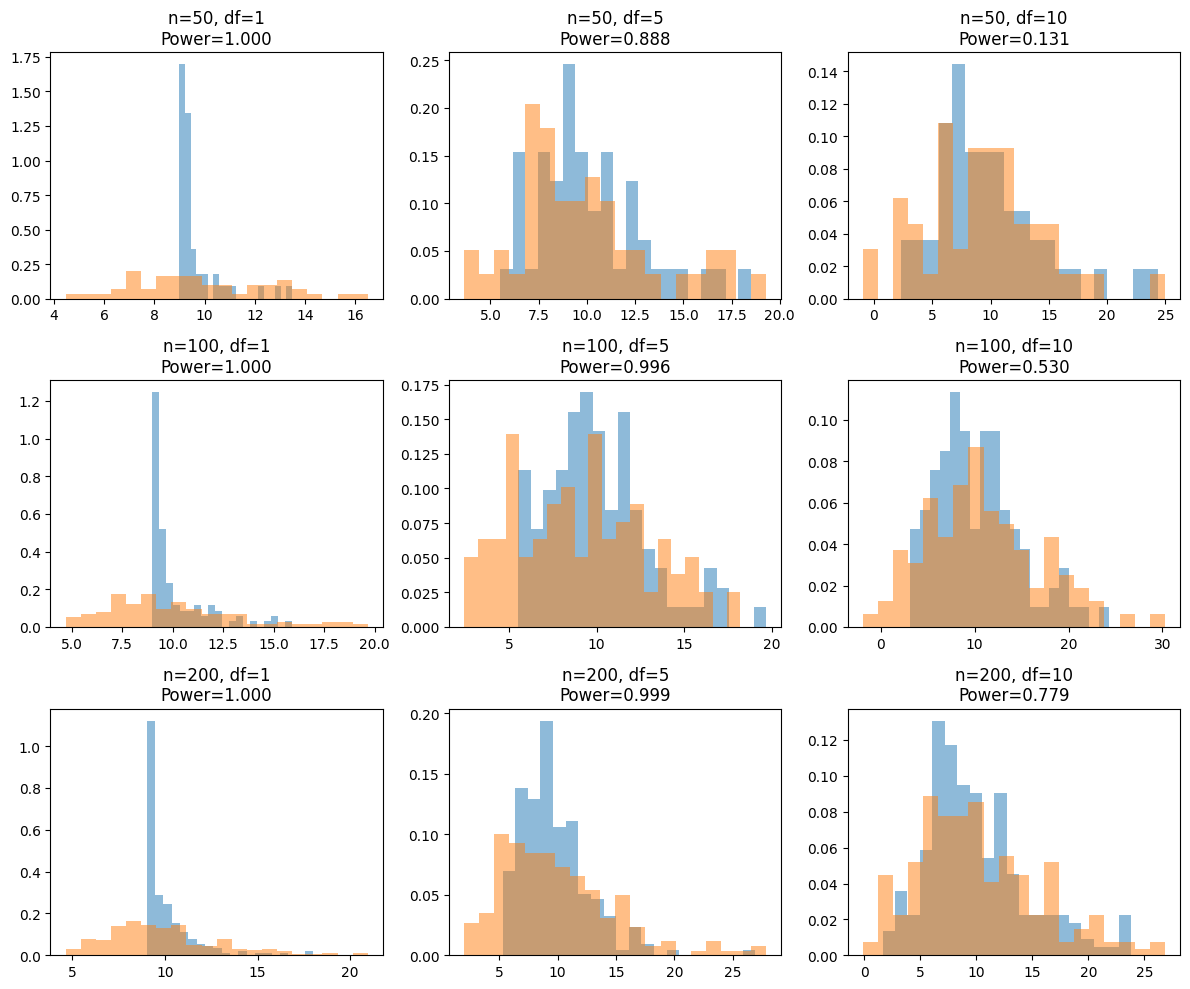

In [12]:
np.random.seed(seed=411052)
n_repeats = 1000  # liczba powtórzeń symulacji dla każdej kombinacji parametrów
n_values = [50, 100, 200]  # liczby elementów w próbkach
df_values = [1, 5, 10]  # liczby stopni swobody
# utworzenie siatki wykresów
fig, axs = plt.subplots(len(n_values), len(df_values), figsize=(12, 10))
# ustalenie wartości oczekiwanej dla danych
exp_mean = 10

# funkcja obliczająca moc testu
def compute_power(data1, data2):
    _, p_value = kstest(data1, data2)
    return 1 - p_value

# pętle wykonujące symulację
for i, n in enumerate(n_values):
    for j, df in enumerate(df_values):
        power_values = []
        for _ in range(n_repeats):
            # generowanie próbek danych z rozkładu chi2
            data1 = np.random.chisquare(df, size=n) - df + exp_mean
            data2 = np.random.chisquare(df + 5, size=n) - df - 5 + exp_mean

            # obliczenie mocy testu
            power = compute_power(data1, data2)
            power_values.append(power)

        # obliczenie średniej mocy testu
        mean_power = np.mean(power_values)
        # wykres
        axs[i,j].hist(data1, alpha=0.5, bins=20, density=True)
        axs[i,j].hist(data2, alpha=0.5, bins=20, density=True)
        axs[i,j].set_title(f'n={n}, df={df}\nPower={power:.3f}')

plt.tight_layout()
plt.show()
